# Title Of Project
## **Hand written digit prediction-classification analysis**

**Objectives** of Classify handwritten digits using a Random Forest Classifier.

The steps involved are:

1. Load and visualize the handwritten digits dataset.
2. Preprocess the data by reshaping and scaling the images.
3. Split the data into training and testing sets.
4. Train a Random Forest Classifier on the training data.
5. Predict the labels for the test data.
6. Evaluate the model's performance using metrics like confusion matrix and classification report.


### Import Library

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

### Import Data

In [2]:
from sklearn.datasets import load_digits

### Describe Data

In [5]:
data_=load_digits()
data_

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

### Data Visualization

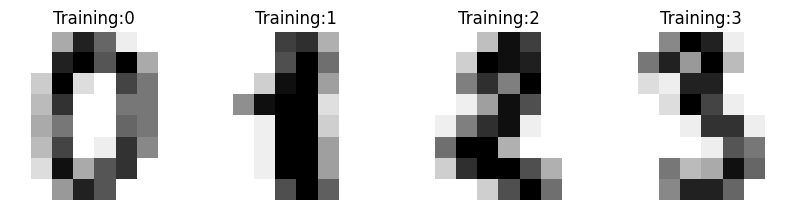

In [38]:
_,axes=plt.subplots(
    nrows=1,ncols=4,figsize=(10,3)
)
for ax,images,label in zip(axes,data_.images,data_.target):
  ax.set_axis_off()
  ax.imshow(images,cmap=plt.cm.gray_r,interpolation="nearest")
  ax.set_title("Training:%i"%label)

In [9]:
data_.images.shape

(1797, 8, 8)

In [10]:
data_.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
data_.images[0].shape

(8, 8)

In [12]:
len(data_.images)

1797

### Data Preprocessing

In [13]:
n_samples=len(data_.images)
data=data_.images.reshape((n_samples,-1))

In [14]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [15]:
data[0].shape

(64,)

In [16]:
data.shape

(1797, 64)

## Scaling image data

In [17]:
data.min()

0.0

In [18]:
data.max()

16.0

In [19]:
data=data/16

In [20]:
data.min()

0.0

In [21]:
data.max()

1.0

In [22]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

## Train Test Split Data

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(data,data_.target,test_size=0.3)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

## Random Forest Model

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
random_forest=RandomForestClassifier()

In [29]:
random_forest.fit(X_train,y_train)

RandomForestClassifier()

## Predict Test Data

In [31]:
y_pred=random_forest.predict(X_test)

In [32]:
y_pred

array([8, 0, 8, 4, 5, 2, 2, 3, 2, 8, 3, 6, 8, 1, 9, 4, 8, 7, 9, 9, 7, 5,
       5, 1, 9, 0, 6, 5, 2, 9, 9, 1, 1, 3, 8, 2, 6, 0, 4, 1, 2, 0, 8, 1,
       8, 7, 5, 6, 1, 8, 1, 3, 2, 9, 5, 2, 6, 2, 8, 2, 2, 0, 0, 5, 2, 5,
       8, 1, 9, 2, 2, 8, 0, 2, 4, 1, 3, 6, 5, 3, 8, 7, 0, 8, 6, 2, 2, 9,
       4, 1, 0, 5, 9, 1, 0, 8, 1, 6, 6, 4, 9, 9, 9, 2, 3, 3, 0, 6, 1, 2,
       7, 0, 2, 3, 6, 7, 8, 9, 7, 4, 5, 2, 8, 4, 6, 7, 0, 9, 0, 4, 4, 5,
       5, 6, 1, 1, 8, 4, 6, 8, 6, 6, 0, 4, 1, 1, 3, 0, 4, 6, 7, 7, 5, 6,
       3, 1, 3, 6, 0, 1, 4, 8, 3, 2, 9, 7, 1, 4, 5, 4, 6, 8, 8, 5, 5, 5,
       6, 6, 9, 1, 9, 4, 6, 6, 5, 6, 8, 2, 9, 5, 3, 6, 4, 3, 0, 5, 2, 9,
       4, 3, 3, 9, 0, 2, 0, 3, 8, 2, 2, 6, 2, 3, 3, 4, 5, 6, 0, 9, 9, 8,
       7, 7, 8, 5, 6, 9, 2, 6, 6, 8, 5, 9, 6, 0, 8, 0, 2, 3, 4, 9, 9, 6,
       0, 5, 3, 2, 7, 9, 0, 5, 4, 1, 7, 9, 0, 1, 8, 2, 9, 7, 8, 5, 1, 1,
       4, 0, 9, 9, 3, 0, 3, 6, 3, 8, 3, 8, 9, 5, 7, 3, 6, 0, 4, 0, 7, 5,
       2, 5, 6, 1, 0, 3, 1, 8, 2, 2, 2, 4, 1, 7, 9,

## Model Accuracy

In [33]:
from sklearn.metrics import confusion_matrix,classification_report

In [34]:
confusion_matrix(y_test,y_pred)

array([[55,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 55,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0, 64,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 43,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 49]])

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       0.96      1.00      0.98        52
           2       0.98      0.98      0.98        56
           3       1.00      0.94      0.97        54
           4       1.00      1.00      1.00        64
           5       0.98      1.00      0.99        55
           6       1.00      0.98      0.99        57
           7       1.00      1.00      1.00        43
           8       0.95      0.98      0.96        53
           9       0.98      0.96      0.97        51

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



 ## Explanation

 It utilizes the scikit-learn library to load a dataset of handwritten digits, preprocess the data, train a Random Forest Classifier model, and evaluate its performance.

1. Loading the Dataset: The code loads the handwritten digits dataset using load_digits from sklearn.datasets. This dataset contains images of handwritten digits (0-9) and their corresponding labels.

2. Data Visualization: The code visualizes a few sample images from the dataset using matplotlib.pyplot. This helps to understand the nature of the data.

3. Data Preprocessing:

  * Reshaping: The images are reshaped from a 2D array (8x8 pixels) to a 1D array (64 features) using reshape. This is done to prepare the data for the machine learning model.
  * Scaling: The pixel values, which originally range from 0 to 16, are scaled to a range of 0 to 1 by dividing by 16. This normalization helps improve the model's performance.
4. Train-Test Split: The data is split into training and testing sets using train_test_split. This allows for evaluating the model's performance on unseen data.

5. Model Training: A Random Forest Classifier model is created using RandomForestClassifier and trained on the training data using fit.

6. Prediction: The trained model is used to predict the labels for the test data using predict.

7. Model Evaluation: The model's performance is evaluated using a confusion matrix and a classification report. These metrics provide insights into the accuracy and precision of the model's predictions.

